# 1.&nbsp;Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
import os
os.getcwd()

'/content'

Download data here: https://drive.google.com/file/d/1_-kRegOMJmIMG6-XnDwYKnADdNounmKm/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset =insurance.csv

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['region'].value_counts(dropna=False)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Objects need to be converted into categorical data

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2.&nbsp;**EDA**

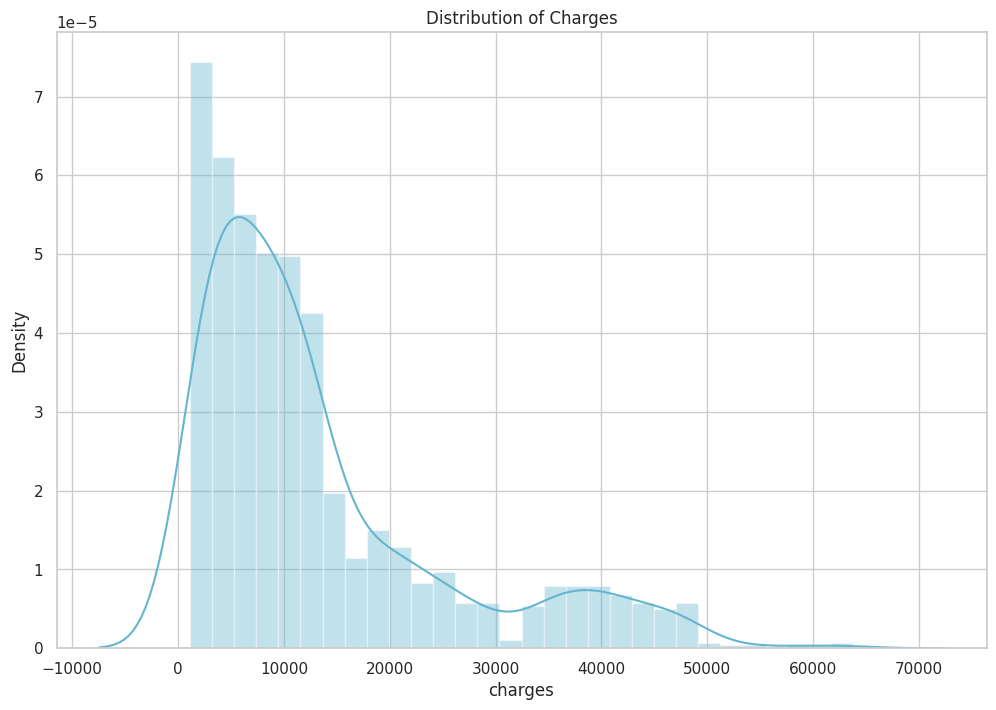

In [ ]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(
    df['charges'], kde=True,
    color='c', ax=ax
)

plt.title('Distribution of Charges');

**Apply Natural Log**

Data terlalu miring (skewed) sehingga tidak mencerminkan normal distribusi. Oleh karena itu apply Natural Log untuk membuat data menjadi distribusi normal atau mencapai varian konstan.

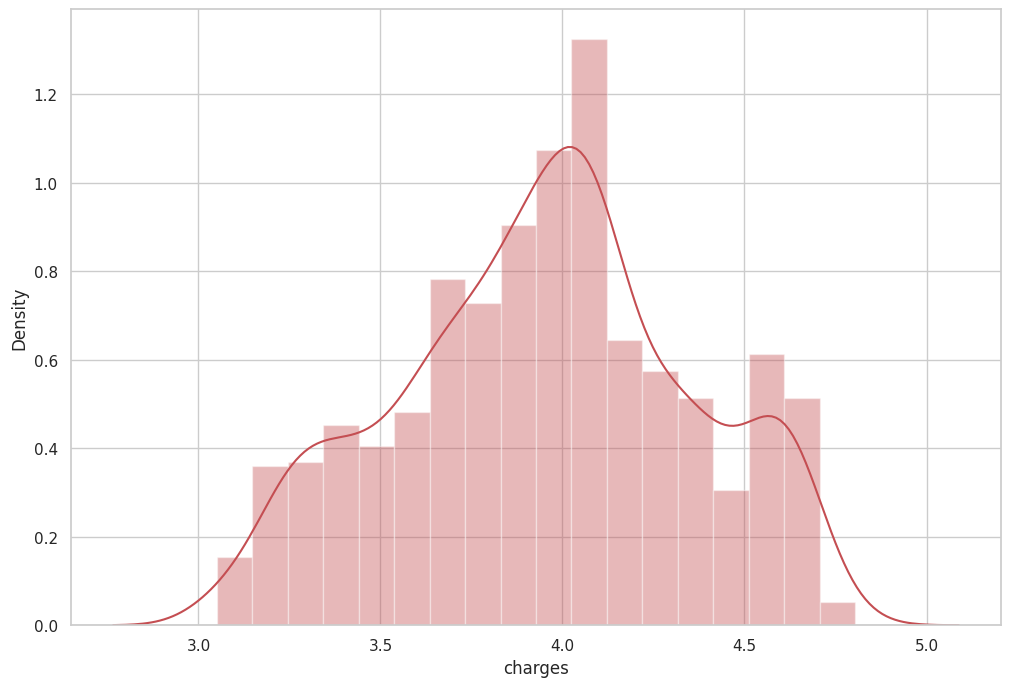

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde=True, color='r')

**Check Each Region**

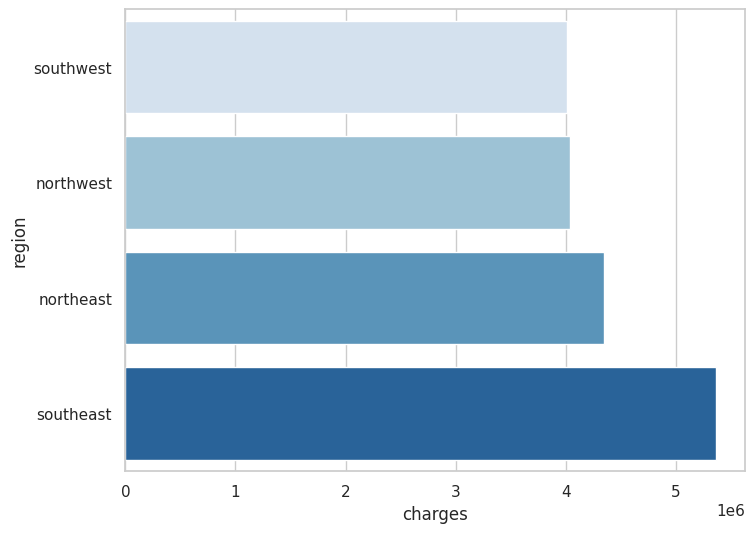

In [ ]:
charges_sum = (
    df['charges']
    .groupby(df.region)
    .sum()
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    x=charges_sum.head(),
    y=charges_sum.head().index,
    palette='Blues',
    ax=ax
);

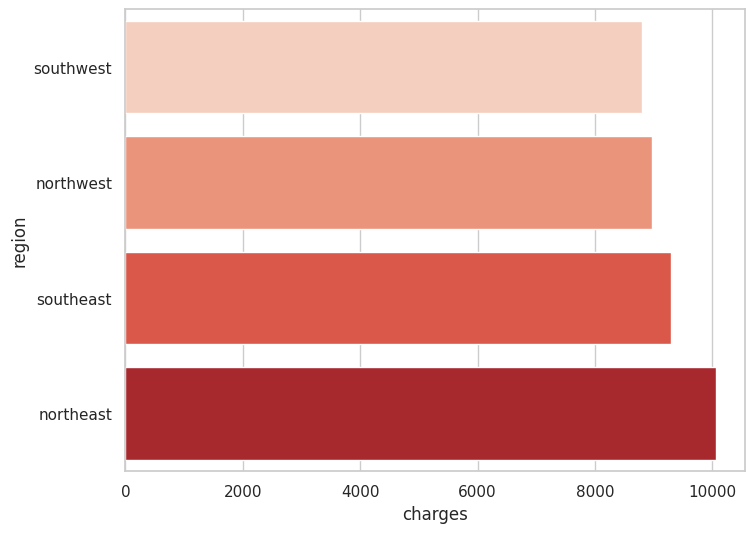

In [ ]:
charges_median = (
    df['charges']
    .groupby(df.region)
    .median()
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    x=charges_median.head(),
    y=charges_median.head().index,
    palette='Reds',
    ax=ax
);

**Charges Per Region Based on Sex**

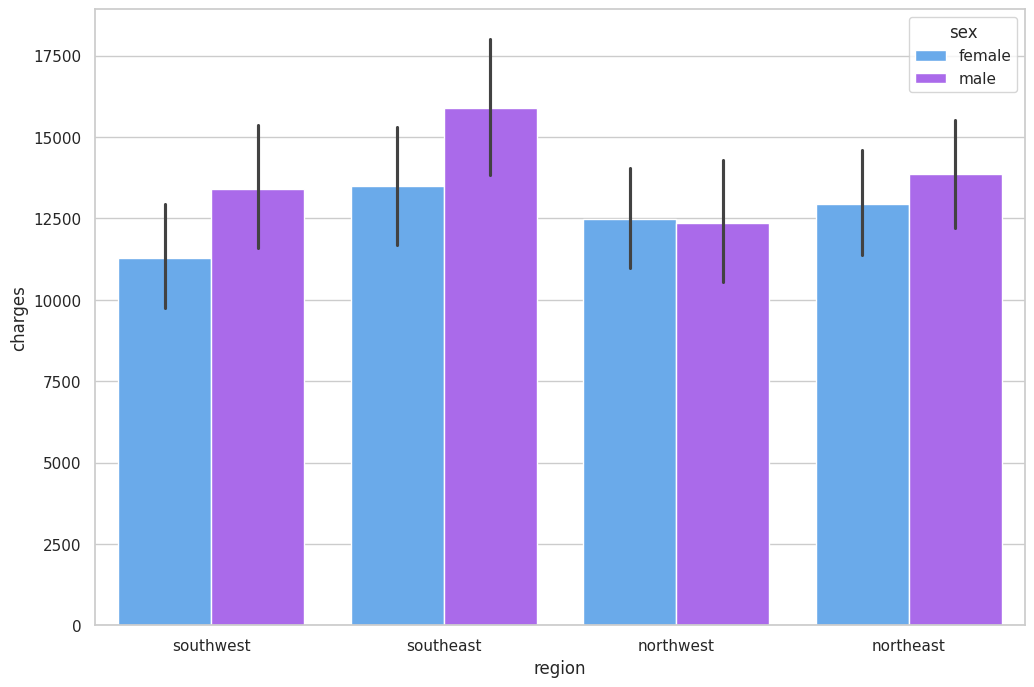

In [ ]:
# Multivariate Analysis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(
    x='region', y='charges',
    hue='sex', data=df,
    palette='cool', ax=ax
);

**Charges per Region Based on Smoker/Non-Smoker**

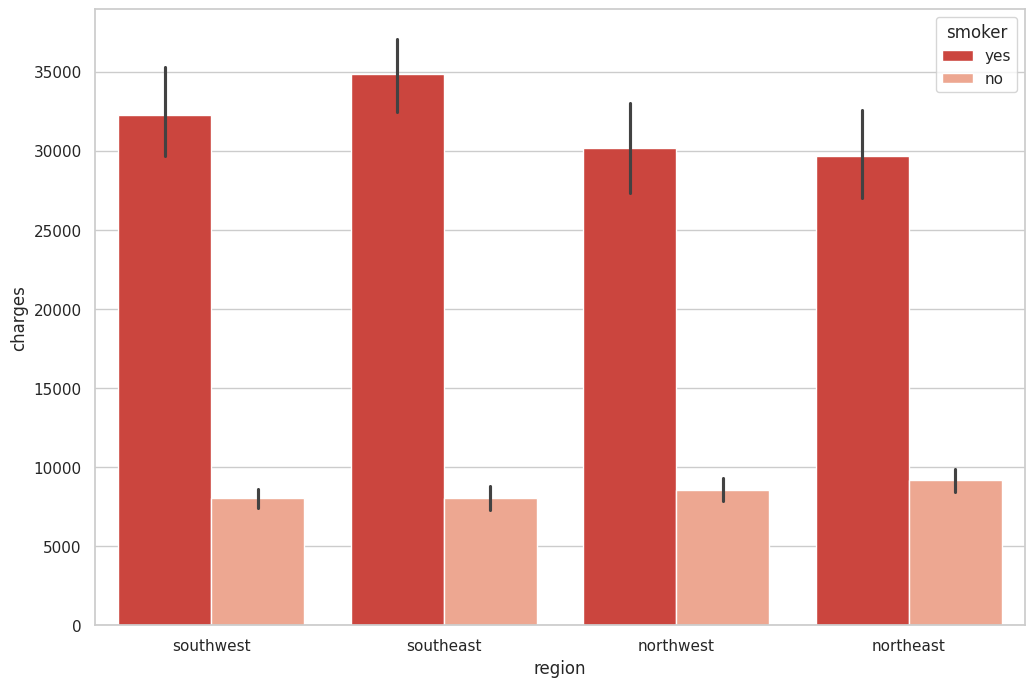

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(
    x='region', y='charges',
    hue='smoker', data=df,
    palette='Reds_r', ax=ax
);

**Charges per Region Based on How Many Children**

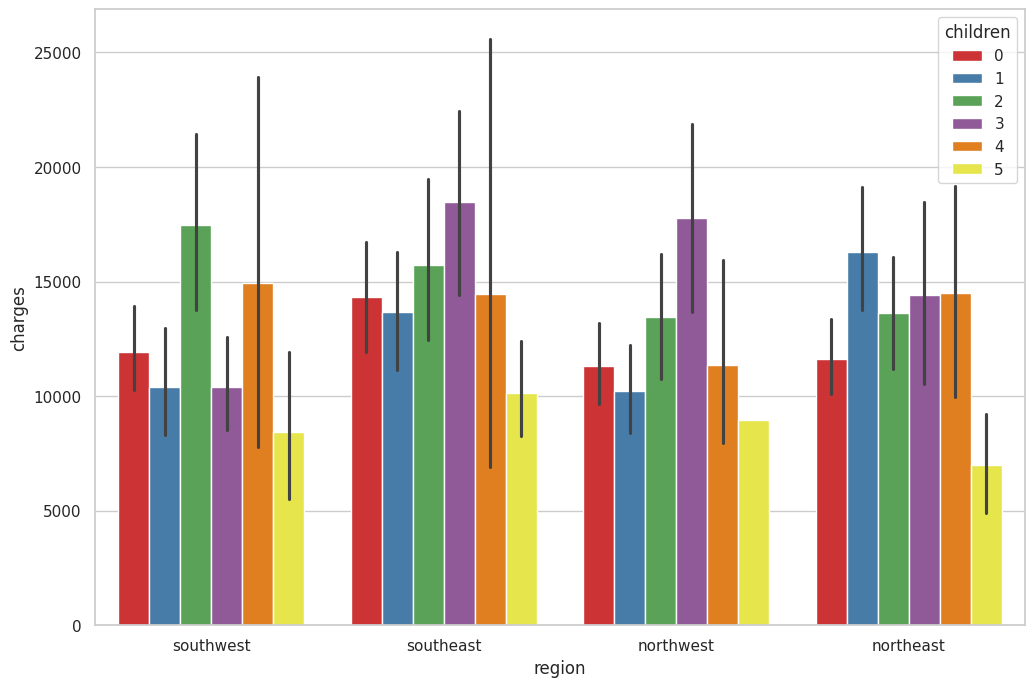

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(
    x='region', y='charges',
    hue='children', data=df,
    palette='Set1', ax=ax
)

# 3.&nbsp;  **Analisa Medical Charges**
berdasarkan faktor 'Smoker' dengan prediktor lain

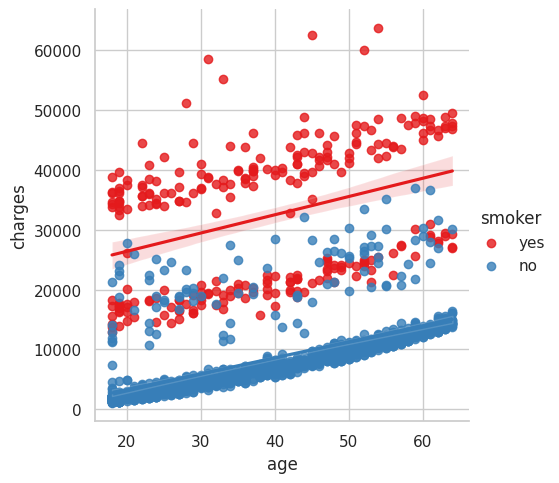

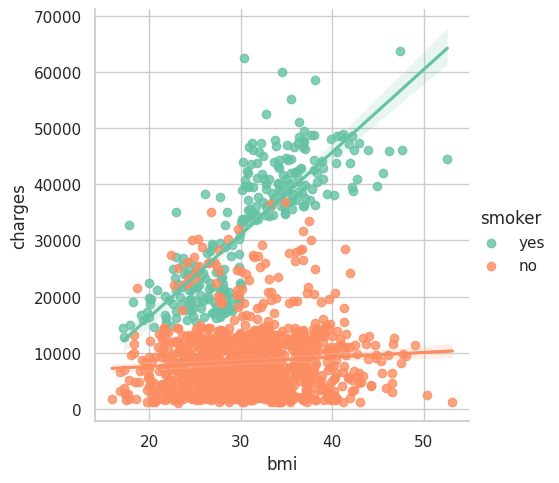

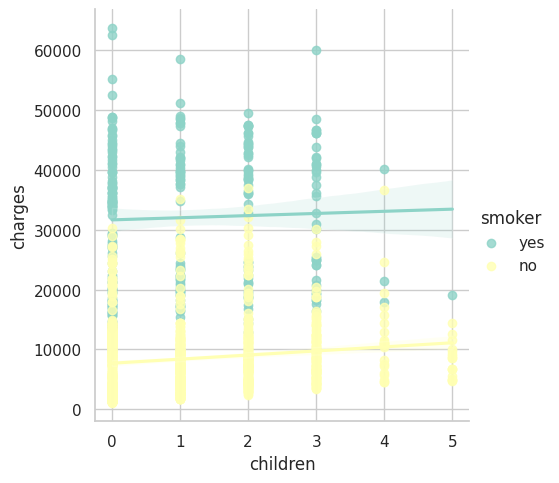

In [ ]:
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set3')

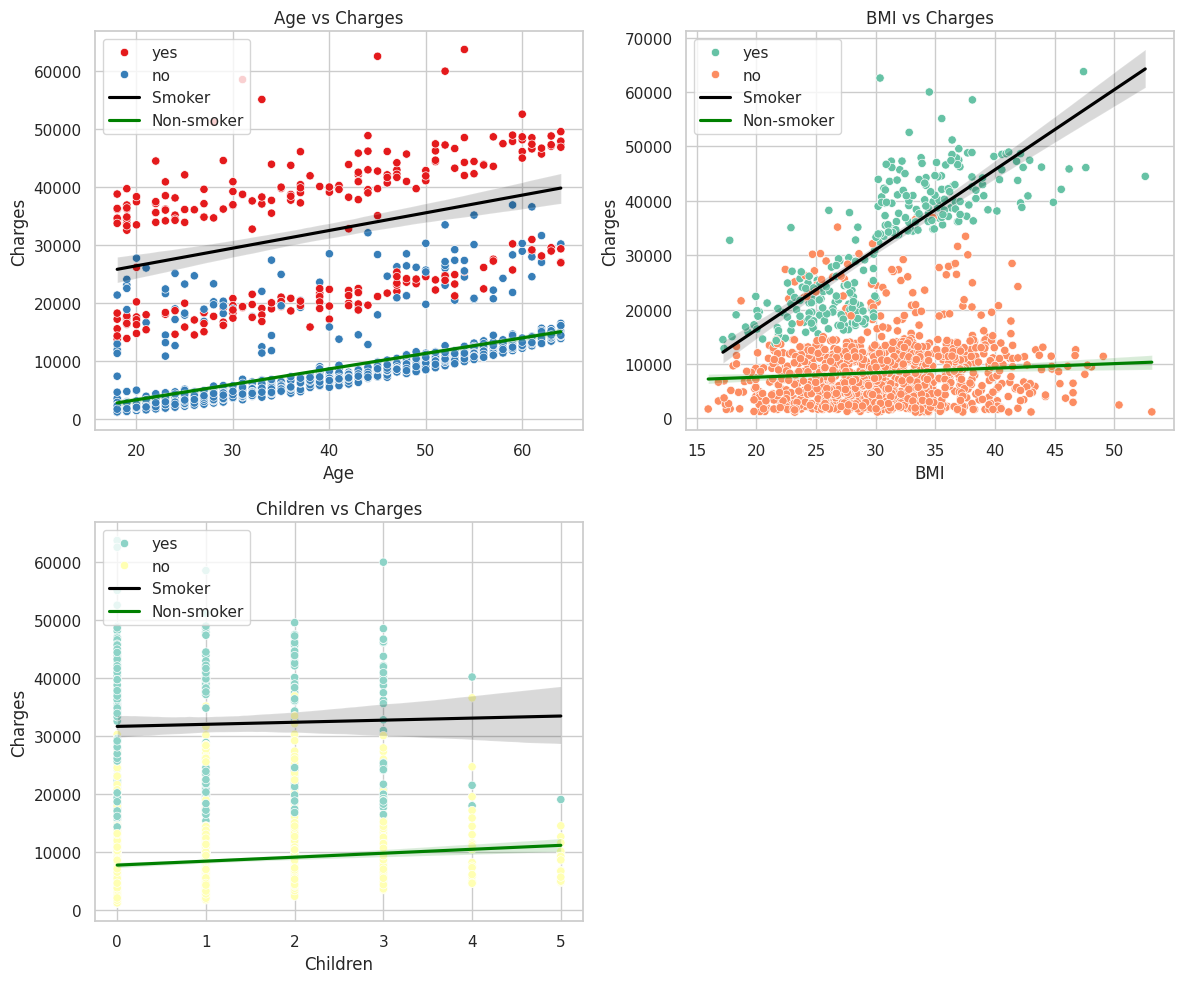

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Age vs Charges
sns.scatterplot(
    x='age', y='charges', data=df, hue='smoker',
    palette='Set1', ax=axs[0, 0], legend=True
)
sns.regplot(
    x='age', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[0, 0], color='black', label='Smoker'
)
sns.regplot(
    x='age', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[0, 0], color='green', label='Non-smoker'
)
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Charges")
axs[0, 0].set_title("Age vs Charges")
axs[0, 0].legend(loc='upper left')

# Plot 2: BMI vs Charges
sns.scatterplot(
    x='bmi', y='charges', data=df, hue='smoker',
    palette='Set2', ax=axs[0, 1], legend=True
)
sns.regplot(
    x='bmi', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[0, 1], color='black', label='Smoker'
)
sns.regplot(
    x='bmi', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[0, 1], color='green', label='Non-smoker'
)
axs[0, 1].set_xlabel("BMI")
axs[0, 1].set_ylabel("Charges")
axs[0, 1].set_title("BMI vs Charges")
axs[0, 1].legend(loc='upper left')

# Plot 3: Children vs Charges
sns.scatterplot(
    x='children', y='charges', data=df, hue='smoker',
    palette='Set3', ax=axs[1, 0], legend=True
)
sns.regplot(
    x='children', y='charges', data=df[df['smoker'] == 'yes'],
    scatter=False, ax=axs[1, 0], color='black', label='Smoker'
)
sns.regplot(
    x='children', y='charges', data=df[df['smoker'] == 'no'],
    scatter=False, ax=axs[1, 0], color='green', label='Non-smoker'
)
axs[1, 0].set_xlabel("Children")
axs[1, 0].set_ylabel("Charges")
axs[1, 0].set_title("Children vs Charges")
axs[1, 0].legend(loc='upper left')

# Remove the empty subplot in the last position
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

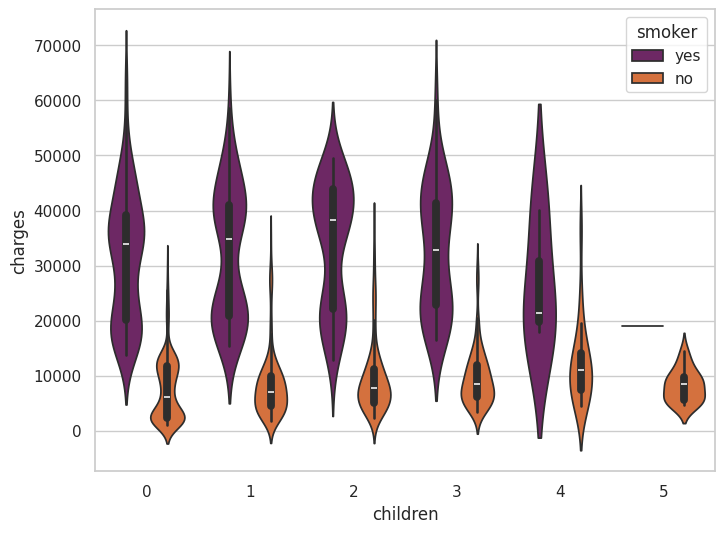

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.violinplot(
    x='children', y='charges',
    data=df, orient='v',
    hue='smoker', palette='inferno',
    ax=ax
);

# 4.&nbsp;**Data Preprocessing**

In [ ]:
# List of columns to convert to categorical
columns_to_convert = ['sex', 'smoker', 'region']

# Convert columns to categorical
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Check the data types after conversion
print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['sex', 'smoker', 'region']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataframe with encoded values
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


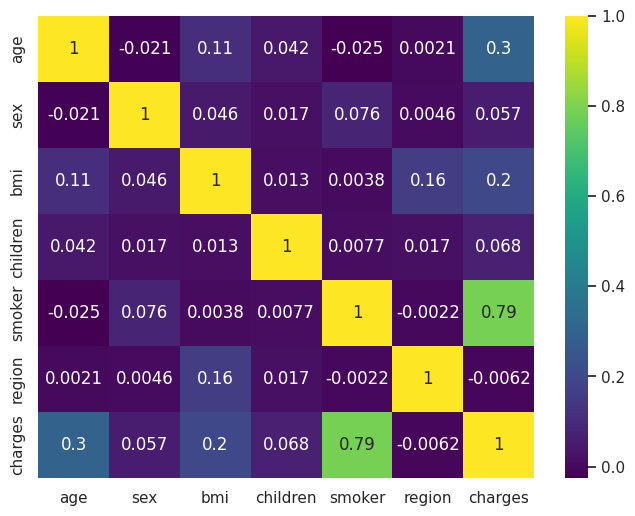

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(
    df.corr(), annot=True,
    cmap="viridis", ax=ax
);

#5.&nbsp; **Algoritma**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare predictor variables (X) and target variable (y)
X = df.drop(['charges'], axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## a. **Linear Regression**

In [ ]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Print intercept and coefficients
print("Intercept:", linear_reg.intercept_)
print("Coefficients:", linear_reg.coef_)

# Calculate R^2 score on the test data
r2_test = r2_score(y_test, y_test_pred)
print("R^2 Score on Test Data:", r2_test)

Intercept: -11946.606567263045
Coefficients: [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
R^2 Score on Test Data: 0.7833463107364539


## b. **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regression model
lasso_reg = Lasso(
    alpha=0.2, fit_intercept=True,
    precompute=False, max_iter=1000,
    tol=0.0001, warm_start=False,
    positive=False, random_state=None,
    selection='cyclic'
)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", lasso_reg.intercept_)
print("Coefficients:", lasso_reg.coef_)

# Calculate R^2 score on the test data
r2_test = lasso_reg.score(X_test, y_test)
print("R^2 Score on Test Data:", r2_test)

Intercept: -11946.483389454786
Coefficients: [ 2.57054693e+02 -1.79030972e+01  3.35769642e+02  4.24958233e+02
  2.36465226e+04 -2.71112111e+02]
R^2 Score on Test Data: 0.7833410023117899


## c. **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_reg = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", ridge_reg.intercept_)
print("Coefficients:", ridge_reg.coef_)

# Calculate R^2 score on the test data
r2_test = ridge_reg.score(X_test, y_test)
print("R^2 Score on Test Data:", r2_test)

Intercept: -11930.88610551844
Coefficients: [ 2.56953795e+02 -1.49035393e+01  3.35787964e+02  4.25317646e+02
  2.35798187e+04 -2.71381009e+02]
R^2 Score on Test Data: 0.7832200105774039


# 6.&nbsp;**Model Evaluation**

In [ ]:
from sklearn.metrics import (
    m
    mean_squared_error,
    mean_absolute_error,

)

SyntaxError: invalid syntax (<ipython-input-42-936b238a8bd4>, line 3)

In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

NameError: name 'mean_absolute_error' is not defined

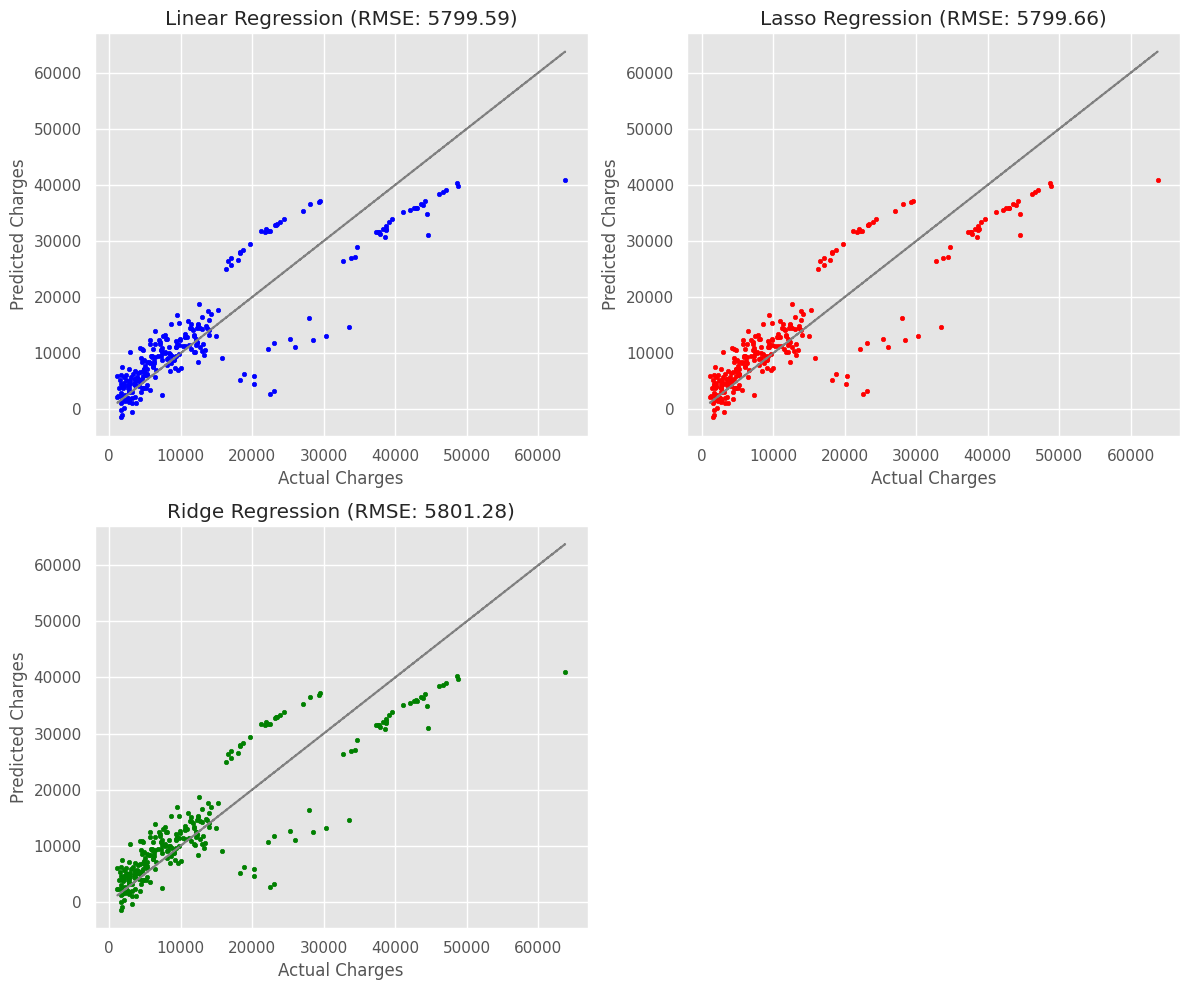

In [ ]:
plt.style.use('ggplot')

# Predicting charges using each regression model
y_test_pred_linear = linear_reg.predict(X_test)
y_test_pred_lasso = lasso_reg.predict(X_test)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Calculating Root Mean Squared Error (RMSE) for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Creating DataFrames to store actual and predicted values for each model
df_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_linear})
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lasso})
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_ridge})

# Plotting y_pred vs y_true for each model in a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Linear Regression
axs[0, 0].scatter(df_linear['Actual'], df_linear['Predicted'], color='blue', s=10)
axs[0, 0].plot(df_linear['Actual'], df_linear['Actual'], '--', color='gray')
axs[0, 0].set_title(f'Linear Regression (RMSE: {rmse_linear:.2f})')
axs[0, 0].set_xlabel('Actual Charges')
axs[0, 0].set_ylabel('Predicted Charges')

# Lasso Regression
axs[0, 1].scatter(df_lasso['Actual'], df_lasso['Predicted'], color='red', s=10)
axs[0, 1].plot(df_lasso['Actual'], df_lasso['Actual'], '--', color='gray')
axs[0, 1].set_title(f'Lasso Regression (RMSE: {rmse_lasso:.2f})')
axs[0, 1].set_xlabel('Actual Charges')
axs[0, 1].set_ylabel('Predicted Charges')

# Ridge Regression
axs[1, 0].scatter(df_ridge['Actual'], df_ridge['Predicted'], color='green', s=10)
axs[1, 0].plot(df_ridge['Actual'], df_ridge['Actual'], '--', color='gray')
axs[1, 0].set_title(f'Ridge Regression (RMSE: {rmse_ridge:.2f})')
axs[1, 0].set_xlabel('Actual Charges')
axs[1, 0].set_ylabel('Predicted Charges')

# Remove the empty subplot in the last position
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Best Model: ?

#7.&nbsp;**Menyimpan Model ke Pickle**

In [ ]:
# Save the best model
with open('linear_reg_model.pkl', 'wb') as file:
    pickle.dump(linear_reg, file)

# 8.&nbsp;**Mengintegrasi Model kedalam Flask**

In [ ]:
!pip install pyngrok

In [ ]:
from flask import Flask, jsonify, request
import pickle
from pyngrok import ngrok
from datetime import datetime

app = Flask(__name__)

# Load the trained model
model_path = (
    "linear_reg_model.pkl"
)
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Route to return basic information
@app.route('/', methods=['GET'])
def index():
    return jsonify({
        "Name": "Hendy Fergus",
        "Status": "Success"
    })

# Route to make predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the request
    data = request.get_json()

    # Extract features from JSON data
    features_predictor = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
    features = [data.get(feature) for feature in features_predictor]

    # Make prediction using the loaded model
    prediction = model.predict([features])[0]

    # Log the input data and prediction
    log_data = {
        **data,
        'Prediction': prediction,
        'Datetime': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    with open("data_collection.txt", "a") as file:
        file.write(str(log_data) + '\n')

    # Set response content type to JSON
    return jsonify({
        "Status": "Success",
        "Prediction": str(prediction)
    }), 200, {'Content-Type': 'application/json'}


if __name__ == "__main__":
    # Start ngrok server
    ngrok.set_auth_token("2eYCum84o0yaJZg0bn8ZSTg7azX_4TMJFZ69MM76MfXsdtWro")
    ngrok_tunnel = ngrok.connect(5000)
    print("Public URL:", ngrok_tunnel.public_url)
    app.run(debug=False)

Public URL: https://08e6-34-125-226-249.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:36:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:36:44] "POST / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:46:31] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:46:35] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:48:18] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:50:25] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:51:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:51:46] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:51:55] "POST /predict HTTP/1.1" 400 -
INFO:werkzeug:127.0.0.1 - - [04/Apr/2024 15:52:33] "POST /predict HTTP/1.1" 200 -